# Подготовка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind


pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [2]:
# Не понятно, чем заполнять пустые значения.
# Построим функцию, которая будет проверять 3 стандартных варианта заполнения,
# из которых можно будет выбрать тот, который меньше всего влияет на распределение основных значений:

def check_fillna(column, details=0):
    p0 = students[column].value_counts().iloc[0] / \
        students[column].value_counts().iloc[1]
    filled_1 = students[column].fillna(method='ffill')
    p1 = filled_1.value_counts().iloc[0] / filled_1.value_counts().iloc[1]
    filled_2 = students[column].fillna(method='bfill')
    p2 = filled_2.value_counts().iloc[0] / filled_2.value_counts().iloc[1]
    filled_3 = students[column].fillna(value=students[column].mode()[0])
    p3 = filled_3.value_counts().iloc[0] / filled_3.value_counts().iloc[1]

    delta = min(abs(p1-p0), abs(p2-p0), abs(p3-p0))

    # блок информации, раскрывающий логику выбора метода заполнения nan, по умолчанию не выводится
    if details == 1:
        display(filled_1.value_counts(dropna=False))
        print('ffill, соотношение двух самых частых ответов =', p1, '(было', p0, ')')
        display(filled_2.value_counts(dropna=False))
        print('bfill, соотношение двух самых частых ответов =', p2, '(было', p0, ')')
        display(filled_3.value_counts(dropna=False))
        print('заполнение модой, соотношение двух самых частых ответов =',
              p3, '(было', p0, ')')

    # выбор метода заполнения
    if abs(p1-p0) == delta:
        students[column].fillna(value=None, method='ffill', inplace=True)
        print('Заполняем пустые ячейки методом forward-fill')
    if abs(p2-p0) == delta:
        students[column].fillna(value=None, method='bfill', inplace=True)
        print('Заполняем пустые ячейки методом back-fill')
    if abs(p3-p0) == delta:
        students[column].fillna(value=students[column].mode()[0], inplace=True)
        print('Заполняем пустые ячейки модой')

    # вывод значений столбца после заполнения
    display(students[column].value_counts(dropna=False))

In [3]:
# Определим функцию, которая строит ящики с усами, показывающие распределение ключевого параметра
# score (количество баллов за экзамен) в зависимости от значения других переменных.

def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index)],
                ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [4]:
# Определим функцию, проверяющую с помощью теста Стьюдента,
# есть ли статистическая разница в распределении оценок по номинативным признакам.
# Функция проверяет нулевую гипотезу о том, что распределения итогов экзамена по различным параметрам неразличимы.
# Параметр alpha позволит проводить проверку на разном уровне значимости.

def get_stat_dif(column, alpha):
    cols = students.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))

    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= alpha/len(combinations_all):    # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

# Обзор данных

In [5]:
students = pd.read_csv('stud_math.xls')
display(students.info())
display(students.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


# Анализ столбцов

In [6]:
students.school.value_counts(dropna=False)

GP    349
MS     46
Name: school, dtype: int64

**Представлены данные всего из двух школ, пропущенных значений и выбросов нет.**

In [7]:
students.sex.value_counts(dropna=False)

F    208
M    187
Name: sex, dtype: int64

**Примерно поровну были опрошены мальчики и девочки, пропущенных значений и выбросов нет.**

In [8]:
students.age.value_counts(dropna=False)

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

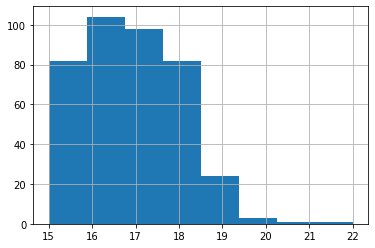

In [9]:
students.age.hist(bins=8)
students.age.describe()

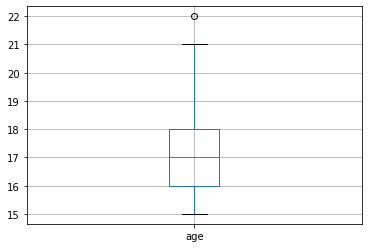

In [10]:
students.boxplot(column='age')

**Представлены данные учеников от 15 до 22 лет, как и указано в описании датасета. Пропущенных значений нет, некорректных данных нет, есть одна запись 22-летнего ученика, которая выходит за межквартильный размах и является выбросом в этом смысле, но т.к. эта запись выглядит корректной, а данных довольно мало, кажется, что выбрасывать его не стоит. Возможно имело бы смысл "слить" все значения 19-, 20-, 21- и 22-летних учеников воедино, создав бакет "19+", который бы содержал какое-то более статистически значимое количество наблюдений, чем 4 эти множества по отдельности.**

In [11]:
students.address.value_counts(dropna=False)

U      295
R       83
NaN     17
Name: address, dtype: int64

**Ещё один параметр с двумя значениями: 'U' — городские ученики, 'R' — ученики, живущие за городом. Выбросов нет, но присутствуют немногочисленные пропуски. Заполним их:**

In [12]:
check_fillna('address')

Заполняем пустые ячейки методом back-fill


U    306
R     89
Name: address, dtype: int64

In [13]:
students.famsize.value_counts(dropna=False)

GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64

**Столбец с данными о размере семьи ученика, снова только два значения: 'GT3' — ученики из семей размера 4+, 'LE3' — ученики с семьёй размером в 1-3 человека. Нет выбросов, но снова немного пропусков. Проверим стандартные варианты заполнения:**

In [14]:
check_fillna('famsize')

Заполняем пустые ячейки методом forward-fill


GT3    279
LE3    115
NaN      1
Name: famsize, dtype: int64

In [15]:
students.famsize.fillna(value=students['famsize'].mode()[0],
                        method=None,
                        inplace=True)
students.famsize.value_counts(dropna=False)

GT3    280
LE3    115
Name: famsize, dtype: int64

**Изначальное заполнение методом ffill не помогло нам с самым первым значением, которое оказалось пустым. Пришлось заменить его на моду.**

In [16]:
students.Pstatus.value_counts(dropna=False)

T      314
NaN     45
A       36
Name: Pstatus, dtype: int64

**2 варианта статуса совместного жилья родителей ('T' — живут вместе, 'A' — раздельно). Выбросов нет, но много пустых значений. Заполним их:**

In [17]:
check_fillna('Pstatus')

Заполняем пустые ячейки методом forward-fill


T    353
A     42
Name: Pstatus, dtype: int64

In [18]:
students.Medu.value_counts(dropna=False)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: Medu, dtype: int64

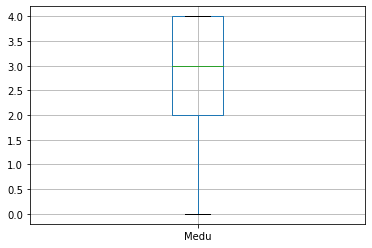

In [19]:
students.boxplot(column='Medu')

**Столбец с данными об образовании матери (0 — нет, 1 — 4 класса, 2 — 5-9 классы, 3 — среднее специальное или 11 классов, 4 — высшее). Фактически номинативная переменная — просто выраженная числовыми значениями. Значение 0.0 не оказалось выбросом в статистическом смысле, но его в любом случае имело смысл сохранить. 3 пустых значения заменяем:**

In [20]:
check_fillna('Medu')

Заполняем пустые ячейки методом forward-fill


4.0    132
2.0    103
3.0     97
1.0     60
0.0      3
Name: Medu, dtype: int64

In [21]:
students.Fedu.value_counts(dropna=False)

2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

**Столбец с данными об образовании отца (0 — нет, 1 — 4 класса, 2 — 5-9 классы, 3 — среднее специальное или 11 классов, 4 — высшее). Значение 40.0 — очевидный выброс и с большой вероятностью это ошибка при вводе значения "4", заменим:**

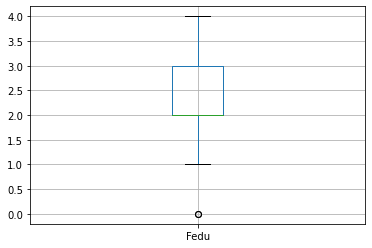

In [22]:
students.Fedu.replace(40, 4, inplace=True)
students.boxplot(column='Fedu')

**Значение 0 не входит в межквартильный размах, но как корректное значение остаётся неизменным. Пропусков не очень много, заполняем:**

In [23]:
check_fillna('Fedu')

Заполняем пустые ячейки методом back-fill


2.0    112
3.0    100
4.0     92
1.0     89
0.0      2
Name: Fedu, dtype: int64

In [24]:
students.Mjob.value_counts(dropna=False)

other       133
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64

**Столбец Mjob - работа матери ('teacher' — учитель, 'health' — сфера здравоохранения, 'services' — гос служба, 'at_home' — не работает, 'other' — другое). Выбросов не видно. Пустых значений мало, но заменить их, кажется, стоит не исходя из сохранения распределения, а модой, значением "other", которое и так является сборной солянкой вариантов:**

In [25]:
students['Mjob'].fillna(value='other', inplace=True)
students.Mjob.value_counts(dropna=False)

other       152
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [26]:
students.Fjob.value_counts(dropna=False)

other       197
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

**Аналогично, столбец Fjob - работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое). Выбросов снова нет, пустых значений мало, заменяем на "other":**

In [27]:
students['Fjob'].fillna(value='other', inplace=True)
students.Fjob.value_counts(dropna=False)

other       233
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [28]:
students.reason.value_counts(dropna=False)

course        137
home          104
reputation    103
other          34
NaN            17
Name: reason, dtype: int64

**Столбец reason — про основную причину выбора школы ('home' — близость к дому, 'reputation' — репутация школы, 'course' — образовательная программа, 'other' — другое). Выбросов не видно, пустых значений мало, вариант other не является модой, видимо, следует заполнить данные привычной определённой заранее процедурой (и добиваем одно незаполненное значение модой):**

In [29]:
check_fillna('reason')

Заполняем пустые ячейки методом back-fill


course        143
home          110
reputation    106
other          35
NaN             1
Name: reason, dtype: int64

In [30]:
students.reason.fillna(value=students['reason'].mode()[0],
                       method=None,
                       inplace=True)
students.reason.value_counts(dropna=False)

course        144
home          110
reputation    106
other          35
Name: reason, dtype: int64

In [31]:
students.guardian.value_counts(dropna=False)

mother    250
father     86
NaN        31
other      28
Name: guardian, dtype: int64

**Столбец guardian — опекун ('mother' — мать, 'father' — отец, 'other' — другое). Выбросов нет, nan мало. check_fillna.**

In [32]:
check_fillna('guardian')

Заполняем пустые ячейки методом forward-fill


mother    273
father     93
other      29
Name: guardian, dtype: int64

In [33]:
students.traveltime.value_counts(dropna=False)

1.0    242
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

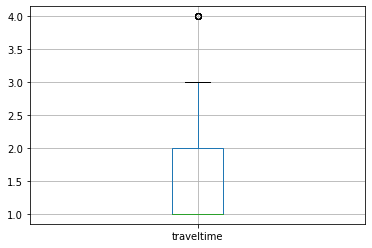

In [34]:
students.boxplot(column='traveltime')

**Столбец traveltime — время в пути до школы (1 — <15 мин., 2 — 15-30 мин., 3 — 30-60 мин., 4 — >60 мин.). Значение 4 не входит в межквартильный размах, но оставляем его неизменным. Некорректных данных нет. Пропусков не очень много, заполняем:**

In [35]:
check_fillna('traveltime')

Заполняем пустые ячейки методом forward-fill


1.0    260
2.0    103
3.0     25
4.0      7
Name: traveltime, dtype: int64

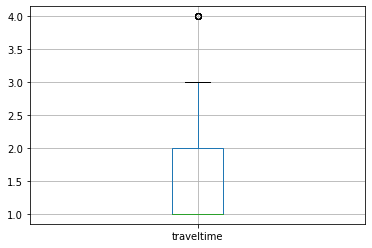

In [36]:
students.boxplot(column='traveltime')

In [37]:
students.studytime.value_counts(dropna=False)

2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64

**Столбец studytime — время на учёбу помимо школы в неделю (1 — <2 часов, 2 — 2-5 часов, 3 — 5-10 часов, 4 — >10 часов). Выбросов нет, пропусков мало, заполняем функцией check_fillna.**

In [38]:
check_fillna('studytime')

Заполняем пустые ячейки методом back-fill


2.0    197
1.0    105
3.0     66
4.0     27
Name: studytime, dtype: int64

In [39]:
students.failures.value_counts(dropna=False)

0.0    293
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64

**Столбец failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0). Не очень понятная переменная, которая, судя по описанию, ещё и склеивает 0, 4, 5 и более неудач (что бы это ни значило...) в одно значение. Все данные корректны, пропуски на третьем месте по количеству, но кажется, что стандартное заполнение — подходящий вариант.**

In [40]:
check_fillna('failures')

Заполняем пустые ячейки методом forward-fill


0.0    310
1.0     52
2.0     17
3.0     16
Name: failures, dtype: int64

In [41]:
students.schoolsup.value_counts(dropna=False)

no     335
yes     51
NaN      9
Name: schoolsup, dtype: int64

**Столбец schoolsup — дополнительная образовательная поддержка (yes или no). Нет выбросов, почти нет пропусков. Заполняем.**

In [42]:
check_fillna('schoolsup')

Заполняем пустые ячейки методом forward-fill


no     343
yes     52
Name: schoolsup, dtype: int64

In [43]:
students.famsup.value_counts(dropna=False)

yes    219
no     137
NaN     39
Name: famsup, dtype: int64

**Столбец famsup — семейная образовательная поддержка (yes или no). Нет выбросов, не очень много пропусков. Заполняем.**

In [44]:
check_fillna('famsup')

Заполняем пустые ячейки методом forward-fill


yes    243
no     152
Name: famsup, dtype: int64

In [45]:
students.paid.value_counts(dropna=False)

no     200
yes    155
NaN     40
Name: paid, dtype: int64

**Столбец paid — дополнительные платные занятия по математике (yes или no). Нет выбросов, не очень много пропусков. Заполняем.**

In [46]:
check_fillna('paid')

Заполняем пустые ячейки методом forward-fill
Заполняем пустые ячейки методом back-fill


no     224
yes    171
Name: paid, dtype: int64

In [47]:
students.activities.value_counts(dropna=False)

yes    195
no     186
NaN     14
Name: activities, dtype: int64

**Столбец activities — дополнительные внеучебные занятия (yes или no). Нет выбросов, мало пропусков. Заполняем.**

In [48]:
check_fillna('activities')

Заполняем пустые ячейки методом forward-fill


yes    203
no     192
Name: activities, dtype: int64

In [49]:
students.nursery.value_counts(dropna=False)

yes    300
no      79
NaN     16
Name: nursery, dtype: int64

**Столбец nursery — посещал детский сад (yes или no). Нет выбросов, мало пропусков. Заполняем.**

In [50]:
check_fillna('nursery')

Заполняем пустые ячейки методом forward-fill


yes    312
no      83
Name: nursery, dtype: int64

In [51]:
students.higher.value_counts(dropna=False)

yes    356
NaN     20
no      19
Name: higher, dtype: int64

**Столбец higher — хочет получить высшее образование (yes или no). Нет выбросов, пропусков больше, чем вариантов no. Можно заполнить.**

In [52]:
check_fillna('higher')

Заполняем пустые ячейки методом back-fill


yes    375
no      20
Name: higher, dtype: int64

In [53]:
students['studytime, granular'].value_counts(dropna=False)

-6.0     194
-3.0     103
-9.0      64
-12.0     27
 NaN       7
Name: studytime, granular, dtype: int64

**Подозрительный столбец 'studytime, granular' без описания. По распределению выглядит идентичным столбцу studytime. Проверим попарную корреляцию переменных.**

In [54]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161626,-0.154316,0.082806,-0.008146,0.239582,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161626,1.000000,0.580110,-0.146286,0.081791,-0.241899,-0.083012,-0.015502,0.022172,0.066466,-0.050261,-0.011856,0.212158
Fedu,-0.154316,0.580110,1.000000,-0.144193,0.018598,-0.266949,-0.018847,-0.028954,-0.024057,0.033952,0.012831,0.023062,0.115600
traveltime,0.082806,-0.146286,-0.144193,1.000000,-0.098460,0.068685,0.091461,-0.015602,0.000238,0.048851,-0.025539,-0.043407,-0.062511
studytime,-0.008146,0.081791,0.018598,-0.098460,1.000000,-0.178731,-1.000000,0.041486,-0.106305,-0.042176,-0.083336,-0.024862,0.118788
failures,0.239582,-0.241899,-0.266949,0.068685,-0.178731,1.000000,0.185626,-0.023858,0.082136,0.096041,0.063846,0.054263,-0.334081
"studytime, granular",0.015556,-0.083012,-0.018847,0.091461,-1.000000,0.185626,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.015502,-0.028954,-0.015602,0.041486,-0.023858,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.022172,-0.024057,0.000238,-0.106305,0.082136,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.066466,0.033952,0.048851,-0.042176,0.096041,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


**Действительно, значение корреляции между 'studytime, granular' и 'studytime', равное -1 говорит о полной зависимости этих двух переменных, так что можем убрать одну из них из датасета. Другие значения матрицы корреляций показывают, что остальные переменные скорее независимы (только ещё у одной пары коэффициент выше 0.5 — у данных об образовании родителей, что не выглядит неожиданным результатом). Довольно близка к нулю корреляция между score и freetime (~0.019), возможно последнюю переменную можно исключить из датасета перед построением модели.**

In [55]:
students.drop(['studytime, granular'], axis='columns', inplace=True)

In [56]:
students.internet.value_counts(dropna=False)

yes    305
no      56
NaN     34
Name: internet, dtype: int64

**Столбец internet — наличие интернета дома (yes или no). Нет выбросов, пропусков немного. Можно заполнить.**

In [57]:
check_fillna('internet')

Заполняем пустые ячейки методом back-fill


yes    333
no      62
Name: internet, dtype: int64

In [58]:
students.romantic.value_counts(dropna=False)

no     240
yes    124
NaN     31
Name: romantic, dtype: int64

**Столбец romantic — в романтических отношениях (yes или no). Нет выбросов, пропусков немного. Можно заполнить.**

In [59]:
check_fillna('romantic')

Заполняем пустые ячейки методом forward-fill
Заполняем пустые ячейки методом back-fill


no     260
yes    135
Name: romantic, dtype: int64

In [60]:
students.famrel.value_counts(dropna=False)

 4.0    182
 5.0     99
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

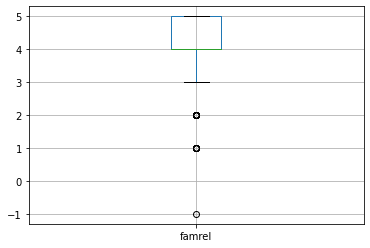

In [61]:
students.boxplot(column='famrel')

**Столбец famrel — семейные отношения (от 1 — очень плохо до 5 — очень хорошо). Есть логический выброс — видимо, случайно вбили -1 вместо 1, заменим. Значения 1 и 2 выходят за рамки межквартильного размаха, но как и прежде, кажется, имеет смысл их оставить (хотя не очевидно, насколько вообще эти данные осмысленны, какой-то сомнительный субъективный параметр). Пропусков немного. Можно заполнить стандартно.**

In [62]:
students.famrel.replace(-1, 1, inplace=True)
check_fillna('famrel')

Заполняем пустые ячейки методом back-fill


4.0    193
5.0    108
3.0     69
2.0     17
1.0      8
Name: famrel, dtype: int64

In [63]:
students.freetime.value_counts(dropna=False)

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
NaN     11
Name: freetime, dtype: int64

**Столбец freetime — свободное время после школы (от 1 — очень мало до 5 — очень мого). Нет выбросов, пропусков мало. Можно заполнить.**

In [64]:
check_fillna('freetime')

Заполняем пустые ячейки методом forward-fill


3.0    157
4.0    114
2.0     68
5.0     38
1.0     18
Name: freetime, dtype: int64

In [65]:
students.goout.value_counts(dropna=False)

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
NaN      8
Name: goout, dtype: int64

**Столбец goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много). Нет выбросов, пропусков мало. Можно заполнить.**

In [66]:
check_fillna('goout')

Заполняем пустые ячейки методом back-fill


3.0    131
2.0    103
4.0     84
5.0     53
1.0     24
Name: goout, dtype: int64

In [67]:
students.health.value_counts(dropna=False)

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
NaN     15
Name: health, dtype: int64

**Столбец health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо). Нет выбросов, пропусков мало. Можно заполнить.**

In [68]:
check_fillna('health')

Заполняем пустые ячейки методом forward-fill


5.0    141
3.0     91
4.0     66
1.0     51
2.0     46
Name: health, dtype: int64

In [69]:
students.absences.value_counts(dropna=False)

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
NaN       12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

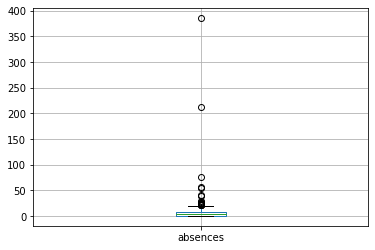

In [70]:
students.boxplot(column='absences')

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

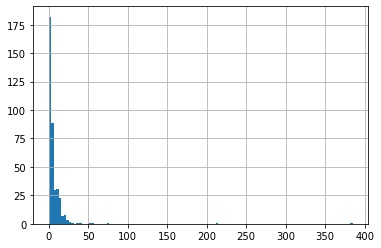

In [71]:
students.absences.hist(bins=120)
students.absences.describe()

**Столбец absences — количество пропущенных занятий. Не график, а один сплошной выброс. Кажется нелогичным заменить все значения, превышающие 22 на медиану (4), т.к. это существенно исказит реальную картину. Но можно заменить медианой пропуски (их мало), а потом заменить все значения, которые больше 22 (все такие значения встречаются не более 1 раза), на 23.**

In [72]:
students.absences.fillna(value=4.0, inplace=True)
students.absences.where(students.absences < 23, other=23, inplace=True)
students.absences.value_counts(dropna=False)

0.0     111
4.0      65
2.0      60
6.0      31
8.0      21
10.0     17
23.0     13
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
18.0      5
5.0       5
20.0      4
22.0      3
1.0       3
9.0       3
11.0      2
13.0      2
15.0      2
21.0      1
19.0      1
17.0      1
Name: absences, dtype: int64

count    395.000000
mean       5.364557
std        6.035324
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       23.000000
Name: absences, dtype: float64

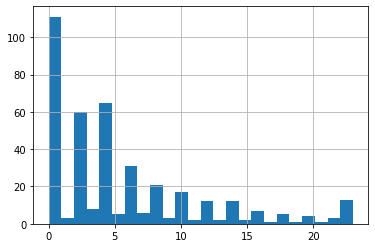

In [73]:
students.absences.hist(bins=24)
students.absences.describe()

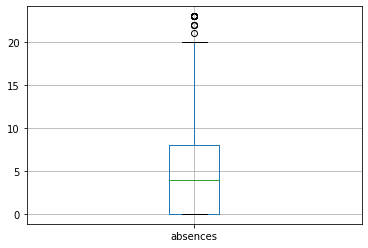

In [74]:
students.boxplot(column='absences')

**После преобразований мы почти избавились от значений, выходящих за межквартильный размах, не повлияв на медиану и на логику распределения. Стала заметна тенденция на преимущественно чётное количество прогулов.**

In [75]:
students.score.value_counts(dropna=False)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

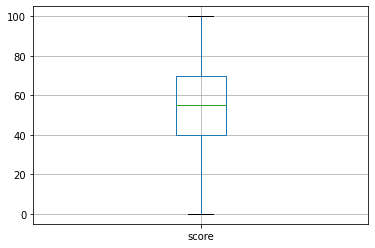

In [76]:
students.boxplot(column='score')

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

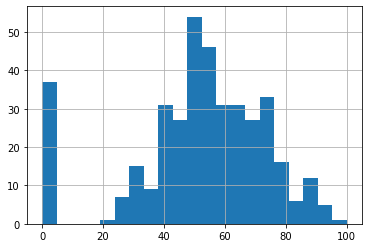

In [77]:
students.score.hist(bins=21)
students.score.describe()

**Столбец score — баллы по госэкзамену по математике. Похоже, что все задания экзамена приносят количество баллов кратное пяти и максимально можно получить 100 баллов. Похоже также, что 20 баллов - это "проходной" балл в том смысле, что всем, кто не смог набрать 20, возможно вносили в базу данных 0 баллов — это могло бы объяснить большое количество значений 0 и отсутствие значений 5, 10 и 15.
Пропусков всего 6, их имеет смысл заменить либо нулями, либо медианным значением (55). Заменим медианой.**

In [78]:
students.score.fillna(value=55.0, inplace=True)

count    395.000000
mean      52.303797
std       22.746314
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

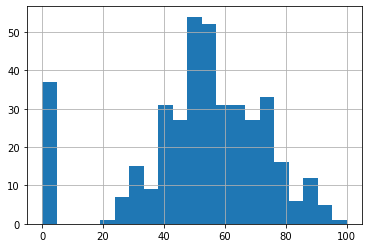

In [79]:
students.score.hist(bins=21)
students.score.describe()

In [80]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    float64
 7   Fedu        395 non-null    float64
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  failures    395 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

# Выбор переменных для построения модели

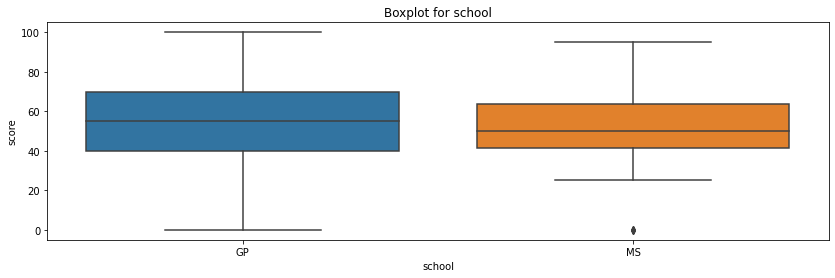

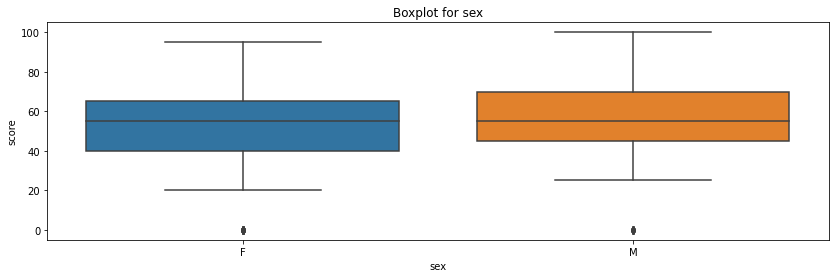

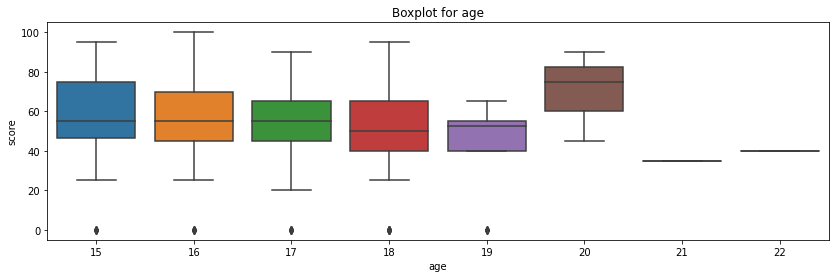

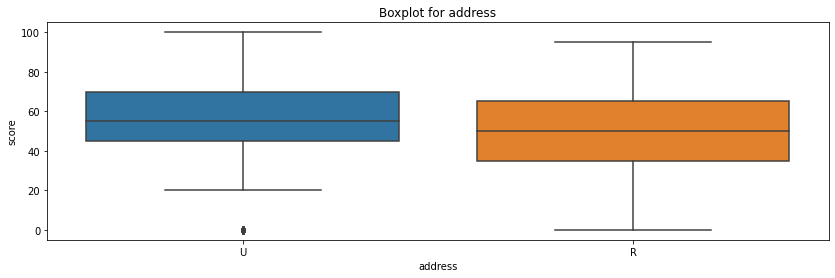

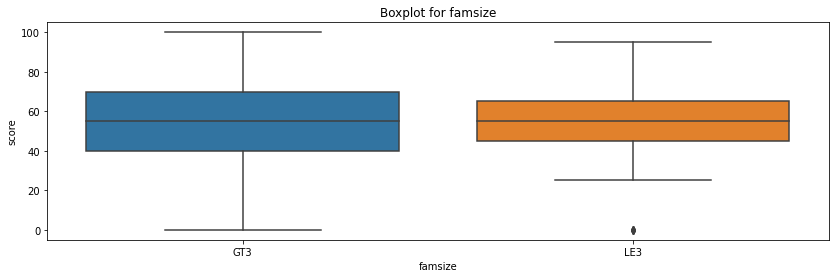

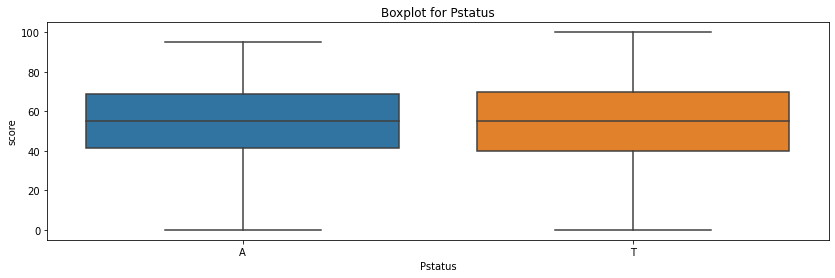

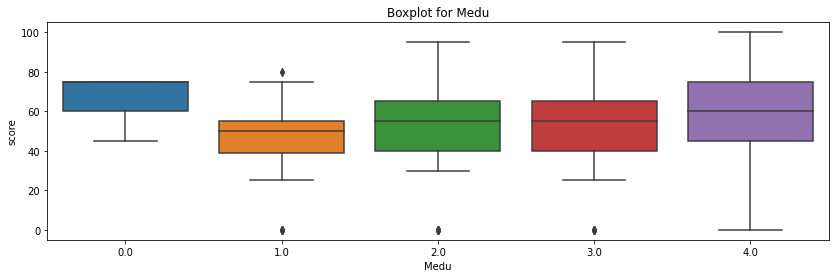

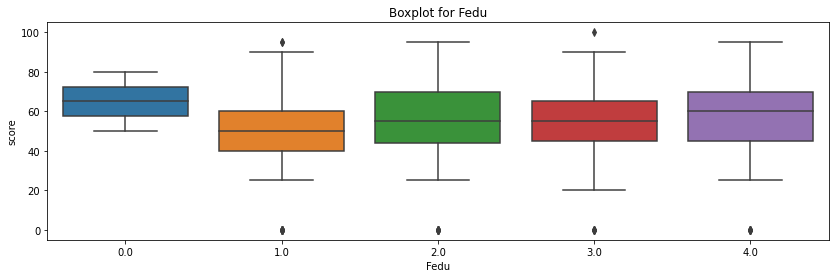

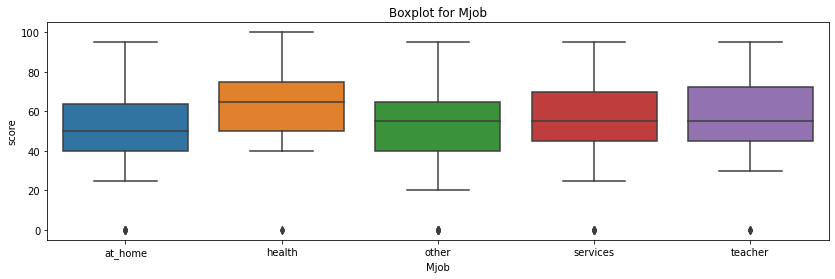

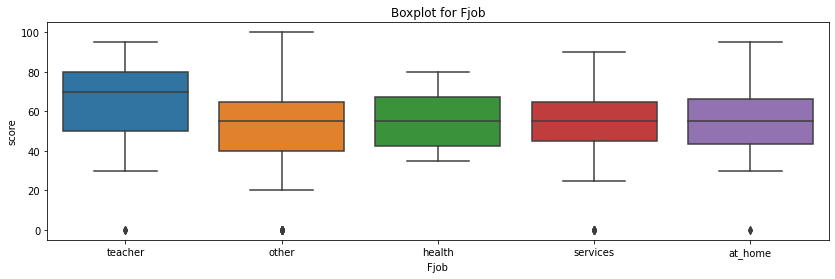

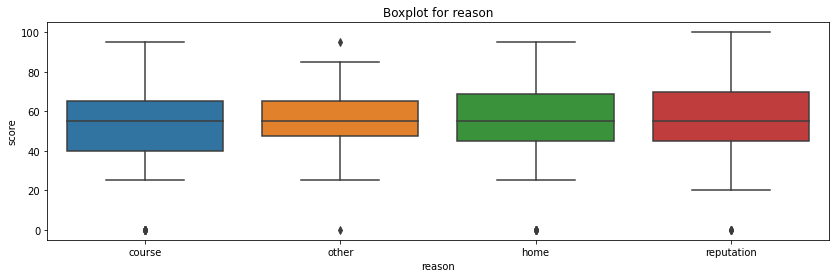

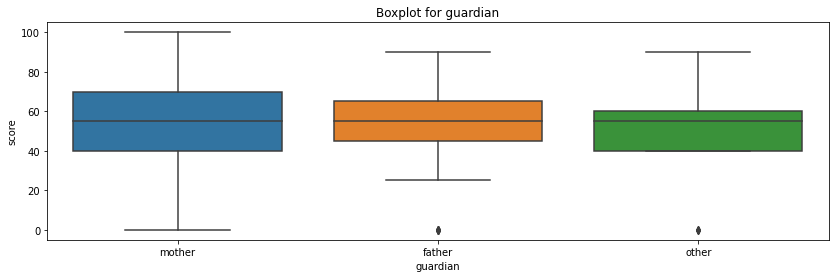

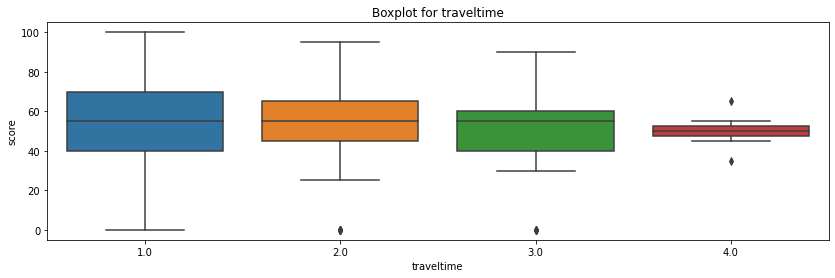

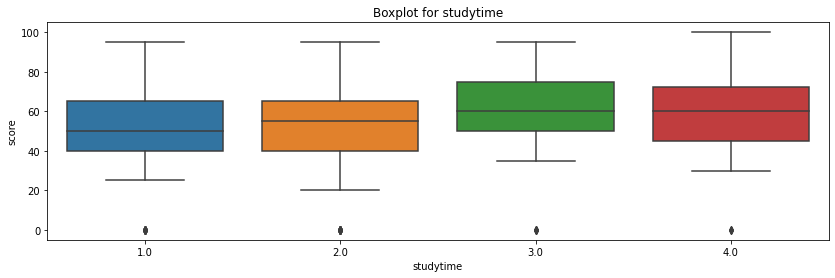

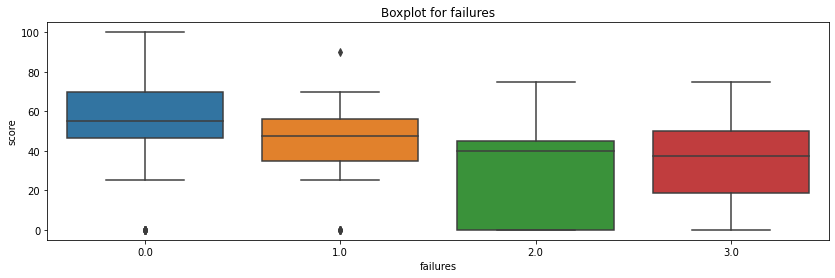

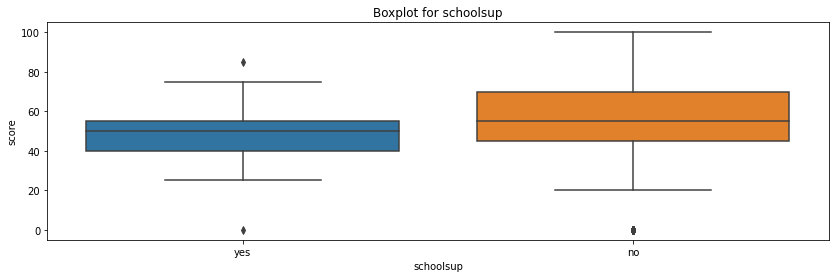

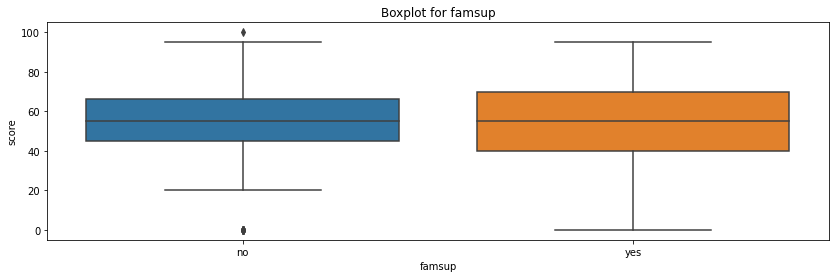

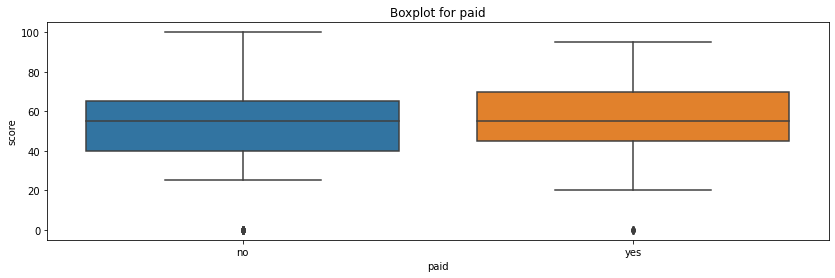

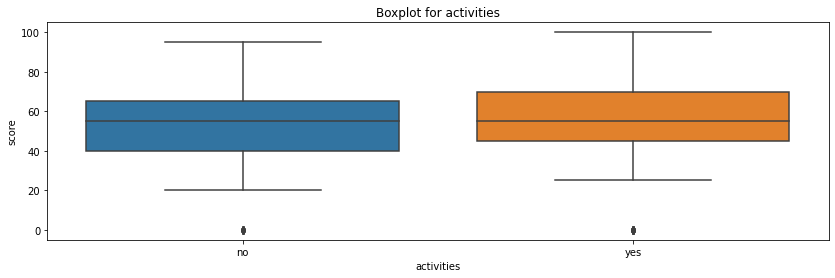

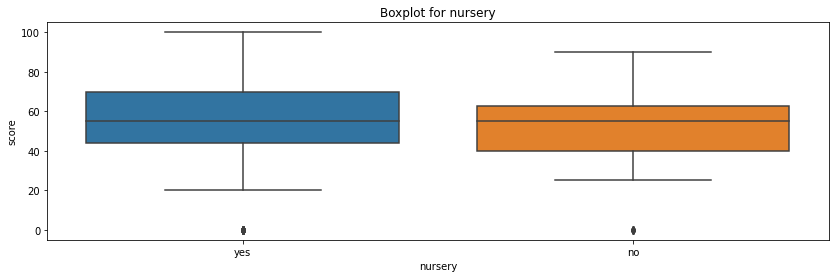

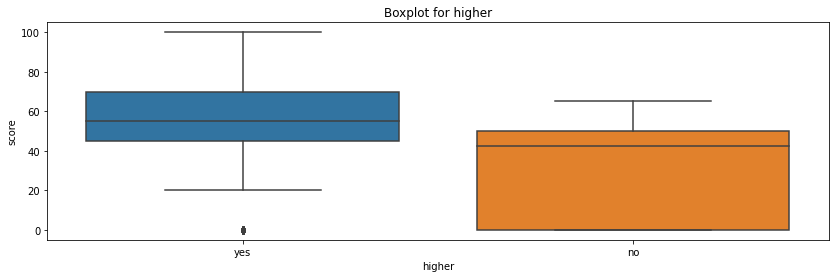

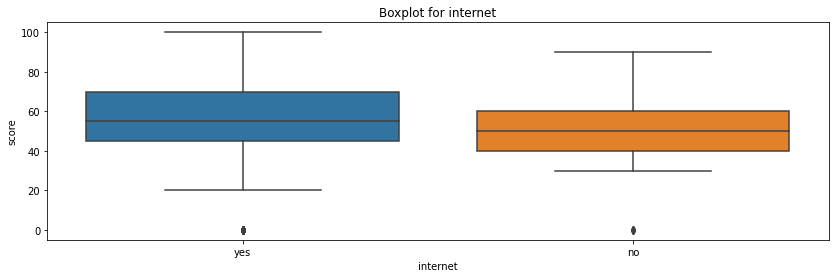

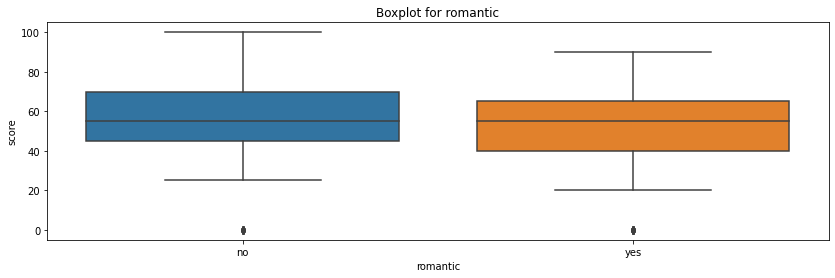

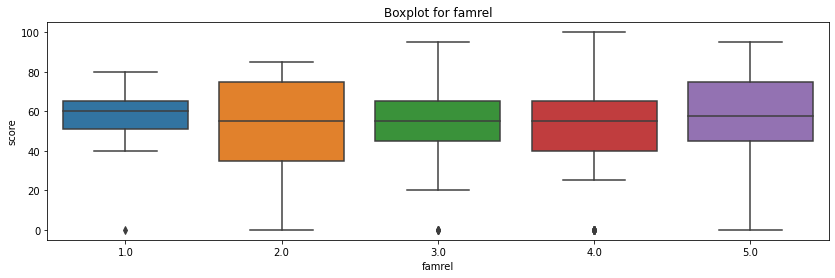

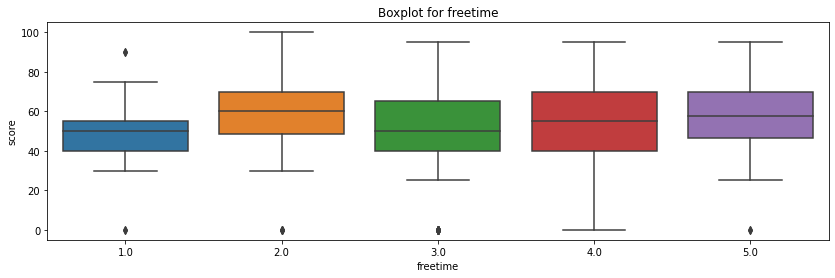

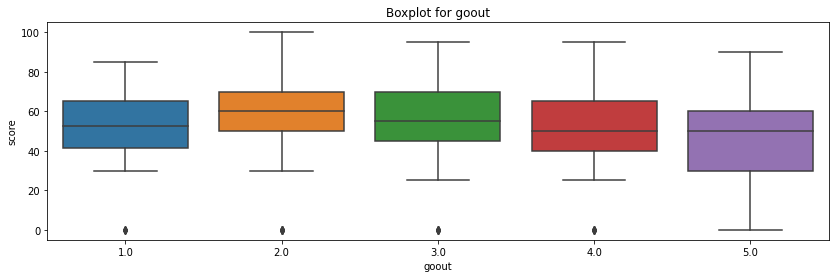

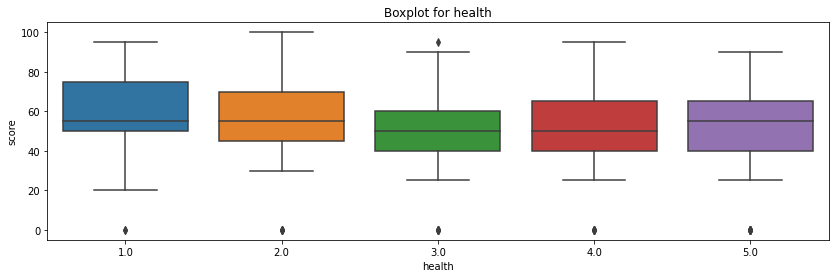

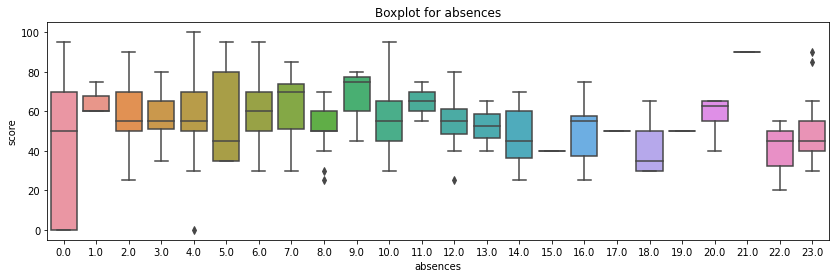

In [81]:
for col in students.columns[:-1]:
    get_boxplot(col)

**Судя по графикам, можно ожидать, что некоторые параметры (скажем, Pstatus или guardian) не будут особо влиять на распределение результатов анализа. Проверим с помощью теста Стьюдента, есть ли статистическая разница в распределении результатов экзамена по всем признакам, с уровнем значимости 10%, 5% и 1%.**

In [92]:
for col in students.columns[:-1]:
    get_stat_dif(col, 0.1)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки absences


In [91]:
for col in students.columns[:-1]:
    get_stat_dif(col, 0.05)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [84]:
for col in students.columns[:-1]:
    get_stat_dif(col, 0.01)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


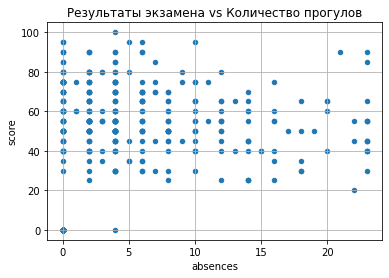

In [85]:
students.plot(x='absences',
              y='score',
              kind='scatter',
              grid=True,
              title='Результаты экзамена vs Количество прогулов')

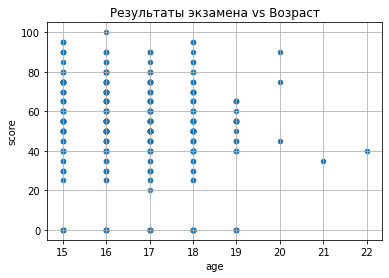

In [86]:
students.plot(x='age',
              y='score',
              kind='scatter',
              grid=True,
              title='Результаты экзамена vs Возраст')

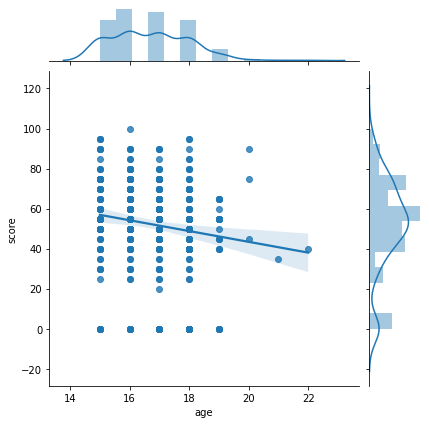

In [87]:
sns.jointplot(x='age', y='score', data=students, kind='reg')

**Отдельные графики числовых параметров age и absences также не выявляют каких-либо характерных зависимостей.**

**По результатам проверки статистической разницы в распределении результатов анализа можно сформировать 2 датасета для модели, исходя из проверки со значимостью в 10% и исходя из проверки со значимостью в 5%:**

In [88]:
students_model_01 = students.loc[:, ['sex', 'address', 'Medu', 'Mjob',
                                     'failures', 'schoolsup', 'paid',
                                     'higher', 'romantic', 'goout', 'absences']]
students_model_01.head()

,sex,address,Medu,Mjob,failures,schoolsup,paid,higher,romantic,goout,absences
0,F,U,4.0,at_home,0.0,yes,no,yes,no,4.0,6.0
1,F,U,1.0,at_home,0.0,no,no,yes,no,3.0,4.0
2,F,U,1.0,at_home,3.0,yes,no,yes,no,2.0,10.0
3,F,U,4.0,health,0.0,no,yes,yes,yes,2.0,2.0
4,F,U,3.0,other,0.0,no,yes,yes,no,2.0,4.0


In [89]:
students_model_005 = students.loc[:, ['Medu', 'Mjob', 'failures',
                                      'higher', 'romantic']]
students_model_005.head()

,Medu,Mjob,failures,higher,romantic
0,4.0,at_home,0.0,yes,no
1,1.0,at_home,0.0,yes,no
2,1.0,at_home,3.0,yes,no
3,4.0,health,0.0,yes,yes
4,3.0,other,0.0,yes,no


# Выводы

**В результате EDA о влиянии данных об учениках на их результаты на итоговом экзамене по математике были получены следующие выводы:**
 * **Данные достаточно чистые, они почти не содержат некорректных значений и в них достаточно мало пустых значений.**
 * **Значительные выбросы найдены только в данных о пропущенных занятиях, при этом этот параметр позволяет избавиться от выбросов путём несложной замены, не нарушающей логику и непрерывность результатов.**
 * **Самые важные параметры, которые предлагается использовать в дальнейшем для построения основной модели, это Medu (образование матери), Mjob (работа матери), failures (количество внеучебных неудач), higher (наличие или отсутствие цели получить высшее образование), romantic (наличие или отсутствие романтических отношений). В расширенную модель при необходимости можно также добавить параметры sex (пол ученика), address (разделение на городских жителей и жителей пригорода), schoolsup (дополнительная образовательная поддержка), paid (дополнительные платные занятия), goout (количество времени с друзьями) и absences (количество пропущенных занятий).**